In [1]:
import tensorflow as tf
import numpy as np
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

from pulearn import (
    MultilayerPerceptron,
    WeightedUnlabelledMultilayerPerceptron,
    UnlabelledExponentialLossMultilayerPerceptron,
    HardBootstrappingMultilayerPerceptron
)

from pulearn.utils import fit_and_plot, synthesize_pu_labels

In [4]:
# Network Parameters
n_input = 2
n_classes = 2

In [5]:
X, y = datasets.make_moons(n_samples=800, noise=0.2, random_state=0)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.5, random_state=42)
Y_train = np.eye(n_classes)[y_train]
print(X_train.shape)
print(Y_train.shape)

(400, 2)
(400, 2)


# Multilayer Perceptron without PU

Using [ 1.  1.]
Epoch: 0001 cost= 1.225954473
Epoch: 0011 cost= 0.459723212
Epoch: 0021 cost= 0.319957517
Epoch: 0031 cost= 0.260499377
Epoch: 0041 cost= 0.236874737
Epoch: 0051 cost= 0.224799346
Epoch: 0061 cost= 0.214023881
Epoch: 0071 cost= 0.201879278
Epoch: 0081 cost= 0.187800832
Epoch: 0091 cost= 0.171065345
Epoch: 0101 cost= 0.155187286
Epoch: 0111 cost= 0.140450198
Epoch: 0121 cost= 0.127702476
Epoch: 0131 cost= 0.115328146
Epoch: 0141 cost= 0.104574952
Epoch: 0151 cost= 0.097284388
Epoch: 0161 cost= 0.091904394
Epoch: 0171 cost= 0.087451879
Epoch: 0181 cost= 0.083548130
Epoch: 0191 cost= 0.080994673
Using [ 1.  1.]
Using [ 1.  1.]


<module 'matplotlib.pyplot' from '/home/jihong/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

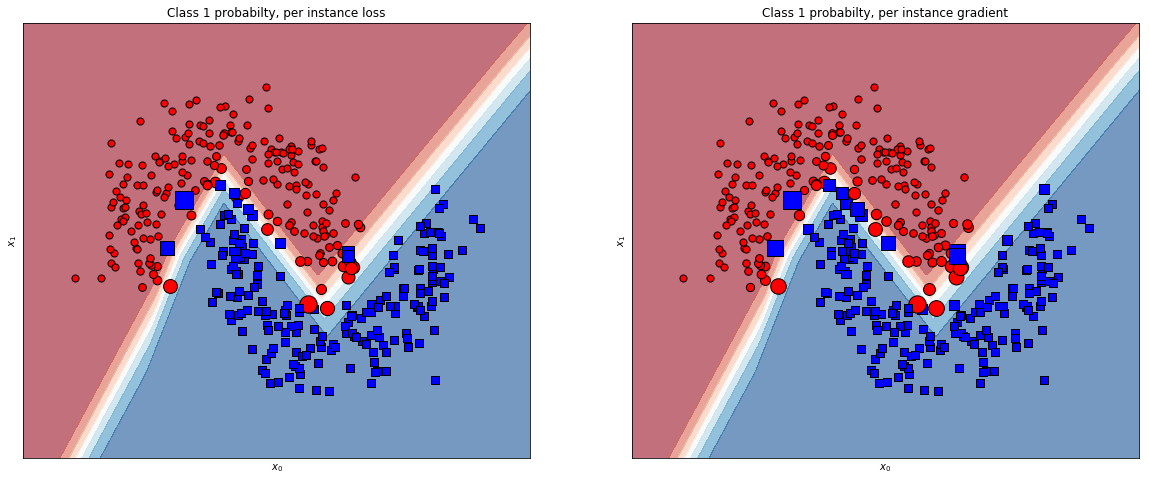

In [4]:
mp = MultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=5e-3,
                          alpha=0,
                          epochs=200,
                          verbose=True)
fit_and_plot(X_train, Y_train, mp, marker_size=["loss", "gradient"])

# PU setup

In [6]:
Y_train_pu = synthesize_pu_labels(Y_train, random_state=42)

### Normal

Using [ 1.  1.]
Epoch: 0001 cost= 2.660153031
Epoch: 0011 cost= 0.687209621
Epoch: 0021 cost= 0.528152697
Epoch: 0031 cost= 0.463964790
Epoch: 0041 cost= 0.439958662
Epoch: 0051 cost= 0.437213928
Epoch: 0061 cost= 0.436591044
Epoch: 0071 cost= 0.435896225
Epoch: 0081 cost= 0.435489006
Epoch: 0091 cost= 0.435034215
Using [ 1.  1.]
Using [ 1.  1.]


<module 'matplotlib.pyplot' from '/home/jihong/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

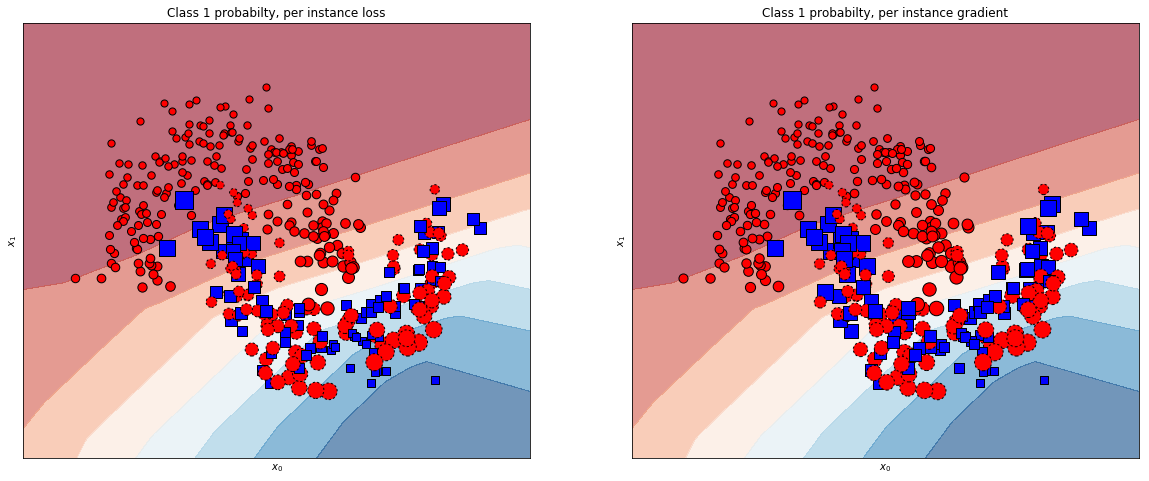

In [7]:
mp = MultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=5e-3,
                          alpha=0,
                          epochs=100,
                          class_weight=None,
                          verbose=True)
fit_and_plot(X_train, Y_train_pu.get(0.5), mp, marker_size=["loss", "gradient"], Y_true=Y_train)

### balanced learning

Using [ 1.          3.23157895]
Epoch: 0001 cost= 1.216025591
Epoch: 0011 cost= 1.016267270
Epoch: 0021 cost= 0.819382772
Epoch: 0031 cost= 0.758633137
Epoch: 0041 cost= 0.732457682
Epoch: 0051 cost= 0.707570255
Epoch: 0061 cost= 0.680724636
Epoch: 0071 cost= 0.661410764
Epoch: 0081 cost= 0.653577954
Epoch: 0091 cost= 0.643753022
Epoch: 0101 cost= 0.636152238
Epoch: 0111 cost= 0.632252052
Epoch: 0121 cost= 0.628102899
Epoch: 0131 cost= 0.623899132
Epoch: 0141 cost= 0.619483173
Epoch: 0151 cost= 0.616652869
Epoch: 0161 cost= 0.619282678
Epoch: 0171 cost= 0.613557413
Epoch: 0181 cost= 0.612498119
Epoch: 0191 cost= 0.622694582
Using [ 1.          3.23157895]
Using [ 1.          3.23157895]


<module 'matplotlib.pyplot' from '/home/jihong/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

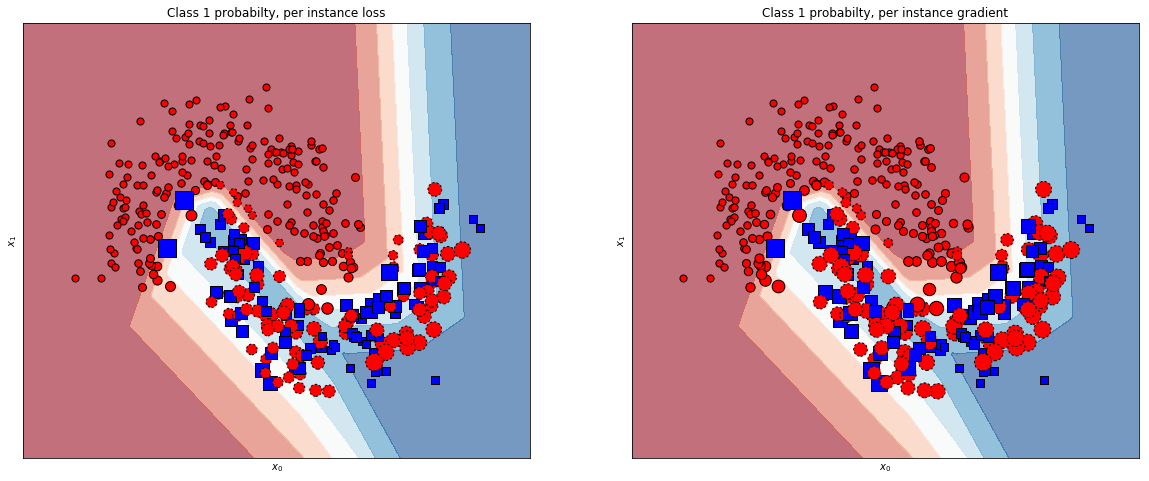

In [8]:
mp = MultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=5e-3,
                          alpha=0,
                          epochs=200,
                          class_weight="balanced",
                          verbose=True)
fit_and_plot(X_train, Y_train_pu.get(0.5), mp, marker_size=["loss", "gradient"], Y_true=Y_train)

### Weighted unlabelled sample

Using [ 1.          3.23157895]
Re-weighing to [ 1.          6.46315789]
Epoch: 0001 cost= 1.504338980
Epoch: 0011 cost= 1.176525205
Epoch: 0021 cost= 1.115487844
Epoch: 0031 cost= 1.080564618
Epoch: 0041 cost= 1.051154435
Epoch: 0051 cost= 1.022661775
Epoch: 0061 cost= 0.994048491
Epoch: 0071 cost= 0.972406387
Epoch: 0081 cost= 0.951776683
Epoch: 0091 cost= 0.940128982
Epoch: 0101 cost= 0.934449479
Epoch: 0111 cost= 0.931433067
Epoch: 0121 cost= 0.927492186
Epoch: 0131 cost= 0.925586417
Epoch: 0141 cost= 0.923784450
Epoch: 0151 cost= 0.922926232
Epoch: 0161 cost= 0.921684980
Epoch: 0171 cost= 0.921383008
Epoch: 0181 cost= 0.920868263
Epoch: 0191 cost= 0.918939292
Using [ 1.          3.23157895]
Re-weighing to [ 1.          6.46315789]
Using [ 1.          3.23157895]
Re-weighing to [ 1.          6.46315789]


<module 'matplotlib.pyplot' from '/home/jihong/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

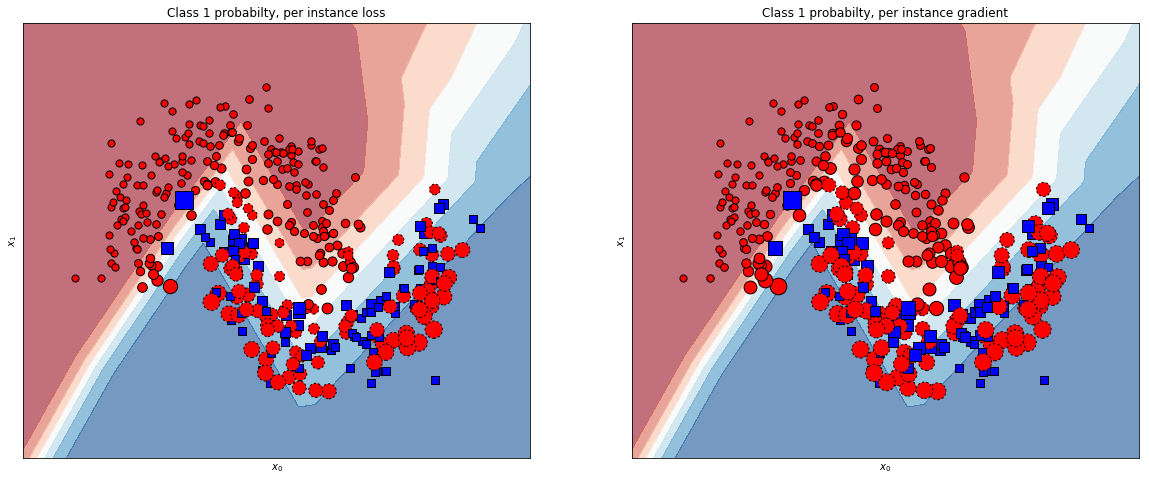

In [9]:
mp = WeightedUnlabelledMultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=5e-3,
                          alpha=0,
                          epochs=200,
                          class_weight="balanced",
                          unlabelled_weight={0:0.5, 1:1},
                          verbose=True)
fit_and_plot(X_train, Y_train_pu.get(0.5), mp, marker_size=["loss", "gradient"], Y_true=Y_train)

Using [ 0.5  1. ] for betas.
Using [ 1.          3.23157895]
Epoch: 0001 cost= 0.930711791
Epoch: 0011 cost= 0.669657409
Epoch: 0021 cost= 0.598846734
Epoch: 0031 cost= 0.575085953
Epoch: 0041 cost= 0.556181818
Epoch: 0051 cost= 0.536125824
Epoch: 0061 cost= 0.514846444
Epoch: 0071 cost= 0.491411224
Epoch: 0081 cost= 0.466869958
Epoch: 0091 cost= 0.452900656
Epoch: 0101 cost= 0.444027014
Epoch: 0111 cost= 0.435304292
Epoch: 0121 cost= 0.429818697
Epoch: 0131 cost= 0.423825800
Epoch: 0141 cost= 0.416956149
Epoch: 0151 cost= 0.413527802
Epoch: 0161 cost= 0.414540432
Epoch: 0171 cost= 0.412815966
Epoch: 0181 cost= 0.404594809
Epoch: 0191 cost= 0.400512263
Using [ 1.          3.23157895]
Using [ 1.          3.23157895]


<module 'matplotlib.pyplot' from '/home/jihong/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

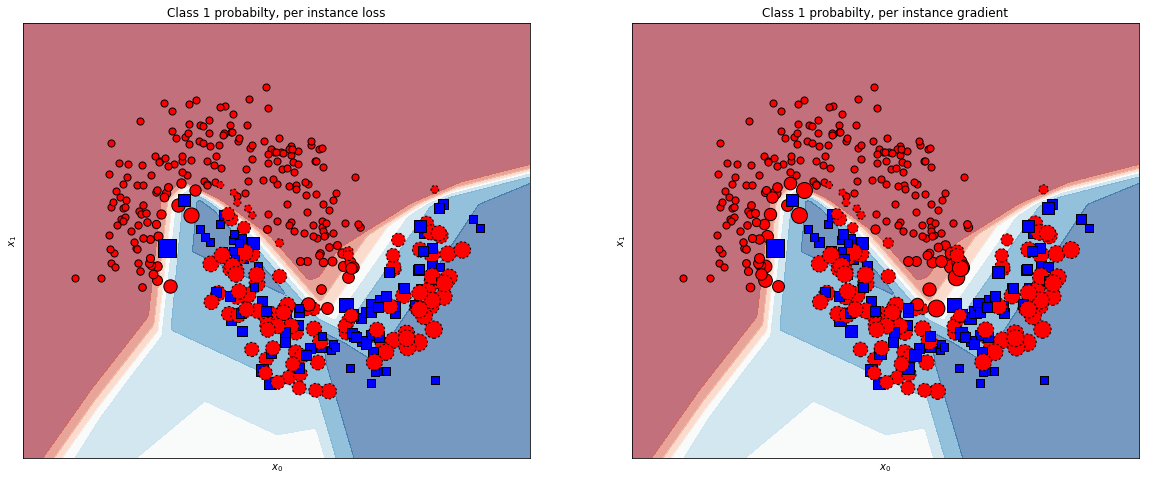

In [10]:
hbmp = HardBootstrappingMultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=1e-2,
                          alpha=0,
                          epochs=200,
                          class_weight="balanced",
                          unlabelled_weight={0:0.5, 1:1},
                          verbose=True)
fit_and_plot(X_train, Y_train_pu.get(0.5), hbmp, marker_size=["loss", "gradient"], Y_true=Y_train)

## Expontenital loss for unlabelled samples

Using [ 1.  1.]
Epoch: 0001 cost= 0.541267976
Epoch: 0011 cost= 0.400528729
Epoch: 0021 cost= 0.360422358
Epoch: 0031 cost= 0.349356711
Epoch: 0041 cost= 0.336621158
Epoch: 0051 cost= 0.322817333
Epoch: 0061 cost= 0.309716865
Epoch: 0071 cost= 0.297172699
Epoch: 0081 cost= 0.287598845
Epoch: 0091 cost= 0.280168809
Epoch: 0101 cost= 0.274693422
Epoch: 0111 cost= 0.269858997
Epoch: 0121 cost= 0.266676612
Epoch: 0131 cost= 0.262388293
Epoch: 0141 cost= 0.259124923
Epoch: 0151 cost= 0.256773751
Epoch: 0161 cost= 0.255505566
Epoch: 0171 cost= 0.253580678
Epoch: 0181 cost= 0.251759853
Epoch: 0191 cost= 0.250541948
Using [ 1.  1.]
Using [ 1.  1.]


<module 'matplotlib.pyplot' from '/home/jihong/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

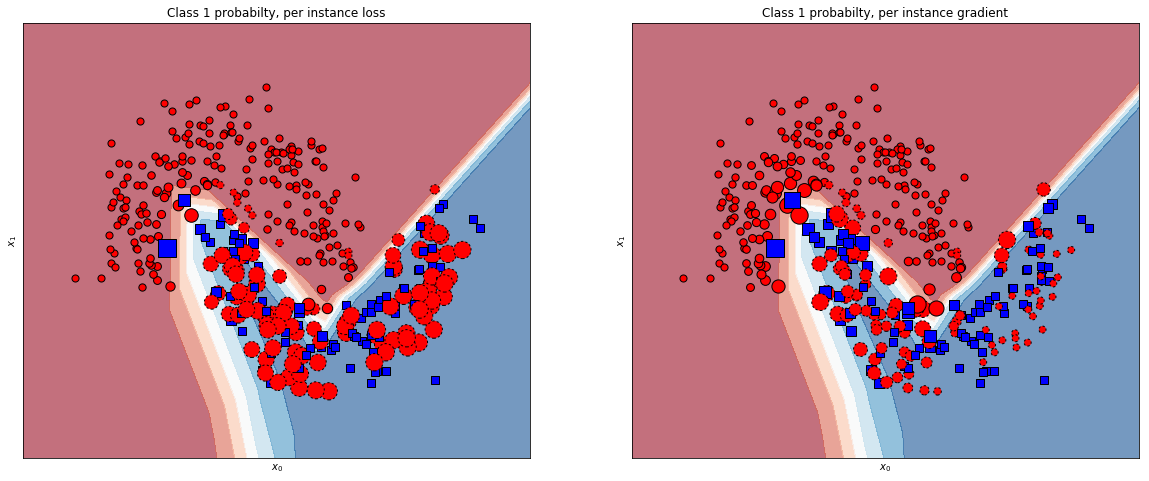

In [7]:
uelmp = UnlabelledExponentialLossMultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=5e-3,
                          alpha=0,
                          epochs=200,
                          class_weight=None,
                          verbose=True)
fit_and_plot(X_train, Y_train_pu.get(0.5), uelmp, marker_size=["loss", "gradient"], Y_true=Y_train)

Using [ 1.          3.23157895]
Epoch: 0001 cost= 0.768677577
Epoch: 0011 cost= 0.756491750
Epoch: 0021 cost= 0.602033570
Epoch: 0031 cost= 0.529938914
Epoch: 0041 cost= 0.446567483
Epoch: 0051 cost= 0.396102019
Epoch: 0061 cost= 0.360249333
Epoch: 0071 cost= 0.334954061
Epoch: 0081 cost= 0.319784246
Epoch: 0091 cost= 0.310803771
Epoch: 0101 cost= 0.304254796
Epoch: 0111 cost= 0.297520038
Epoch: 0121 cost= 0.292311348
Epoch: 0131 cost= 0.287675589
Epoch: 0141 cost= 0.283152375
Epoch: 0151 cost= 0.280944049
Epoch: 0161 cost= 0.276481461
Epoch: 0171 cost= 0.274808213
Epoch: 0181 cost= 0.271218777
Epoch: 0191 cost= 0.268554956
Using [ 1.          3.23157895]
Using [ 1.          3.23157895]


<module 'matplotlib.pyplot' from '/home/jihong/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

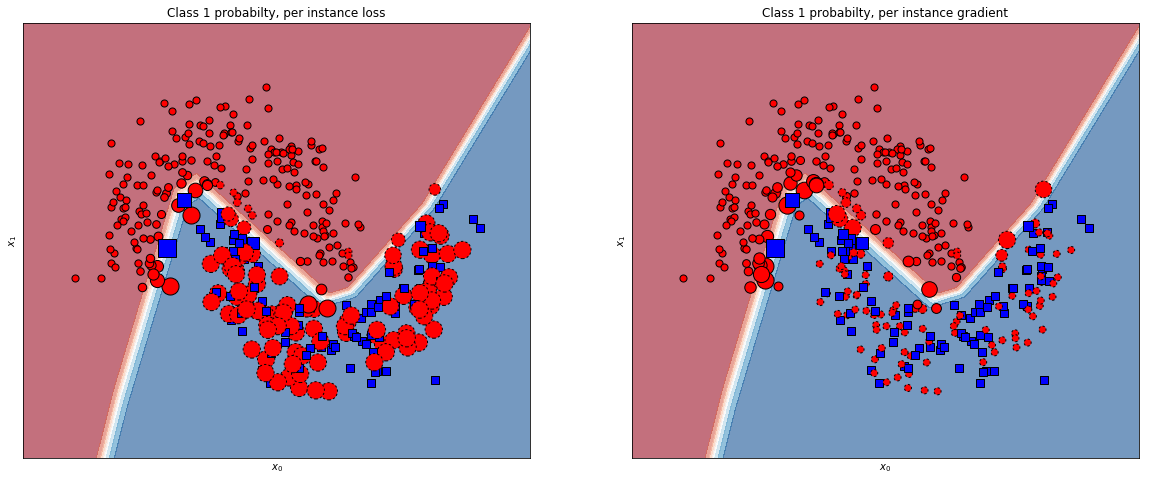

In [15]:
uelmp = UnlabelledExponentialLossMultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=5e-3,
                          alpha=0,
                          epochs=200,
                          class_weight="balanced",
                          unlabelled_weight=None,
                          verbose=True)
fit_and_plot(X_train, Y_train_pu.get(0.5), uelmp, marker_size=["loss", "gradient"], Y_true=Y_train)

Using [ 1.          3.23157895]
Re-weighing to [ 1.          6.46315789]
Epoch: 0001 cost= 2.728914112
Epoch: 0011 cost= 1.125021219
Epoch: 0021 cost= 0.815818369
Epoch: 0031 cost= 0.649999127
Epoch: 0041 cost= 0.594543114
Epoch: 0051 cost= 0.557823658
Epoch: 0061 cost= 0.541852839
Epoch: 0071 cost= 0.521067306
Epoch: 0081 cost= 0.500476636
Epoch: 0091 cost= 0.490632407
Epoch: 0101 cost= 0.483443350
Epoch: 0111 cost= 0.478330031
Epoch: 0121 cost= 0.476304263
Epoch: 0131 cost= 0.473430723
Epoch: 0141 cost= 0.473335534
Epoch: 0151 cost= 0.472798653
Epoch: 0161 cost= 0.471792161
Epoch: 0171 cost= 0.471365392
Epoch: 0181 cost= 0.471458375
Epoch: 0191 cost= 0.470853955
Using [ 1.          3.23157895]
Re-weighing to [ 1.          6.46315789]
Using [ 1.          3.23157895]
Re-weighing to [ 1.          6.46315789]


<module 'matplotlib.pyplot' from '/home/jihong/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

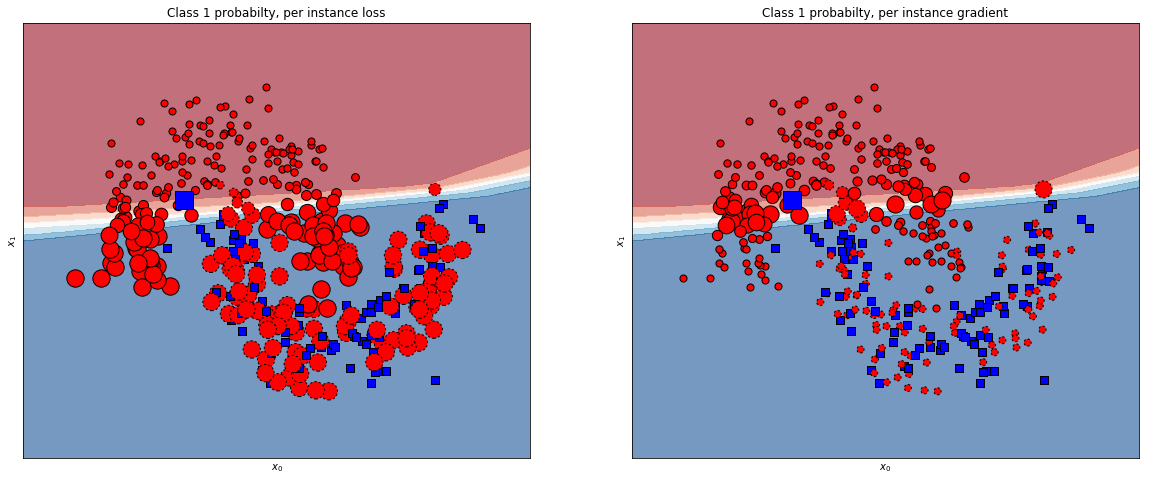

In [14]:
uelmp = UnlabelledExponentialLossMultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=5e-3,
                          alpha=0,
                          epochs=200,
                          class_weight="balanced",
                          unlabelled_weight={0:0.5, 1:1},
                          verbose=True)
fit_and_plot(X_train, Y_train_pu.get(0.5), uelmp, marker_size=["loss", "gradient"], Y_true=Y_train)

## The effect of unlabelled example weight

In [ ]:
n_input = 2
n_classes = 2


n_iters = 10

args_list = []
for it in range(n_iters):
    
    X, y = datasets.make_moons(n_samples=800, noise=0.2)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.5, random_state=42)
    Y_train = np.eye(n_classes)[y_train]
    Y_train_pu = get_PU_labels(Y_train, random_seed=42, verbose=False)
    
    for pct_missing in Y_train_pu.keys():
        for w_unl in np.arange(0.1, 1.01, 0.1):
            for clsf in ['mlp', 'hardb_mlp', 'clsdep_mlp']:
                data = {}
                data["X_train"] = X_train
                data["Y_train"] = Y_train_pu[pct_missing]
                data["X_test"] = X_test
                data["y_test"] = y_test
                data["pct_missing"] = pct_missing
                data["clsf"] = clsf
                data["w_unlabelled"] = w_unl
                args_list.append(data)

def fit_classifier(args):
    pct_missing = args['pct_missing']
    w_unlabelled = args['w_unlabelled']
    
    X_train = args["X_train"]
    Y_train = args["Y_train"]
    X_test = args["X_test"]
    y_test = args["y_test"]
    
    clsf = args["clsf"]
    if clsf == 'mlp':
        classifier = MultilayerPerceptron(n_input=n_input,
              n_classes=n_classes,
              n_hiddens=[8, 8],
              learning_rate=5e-3,
              regularization=0,
              training_epochs=200,
              class_weight=[w_unlabelled, 1],
              imbalanced=True,
              verbose=False)
    elif clsf == 'hardb_mlp':
        classifier = HardBoostrappingMultilayerPerceptron(n_input=n_input,
              n_classes=n_classes,
              n_hiddens=[8, 8],
              learning_rate=5e-3,
              regularization=0,
              training_epochs=200,
              class_weight=None,
              betas=[w_unlabelled, 1],
              imbalanced=True,
              verbose=False)
    elif clsf == 'clsdep_mlp':
        classifier = ClassDepLossMultilayerPerceptron(n_input=n_input,
              n_classes=n_classes,
              n_hiddens=[8, 8],
              learning_rate=5e-3,
              regularization=0,
              training_epochs=200,
              class_weight=[w_unlabelled, 1],
              imbalanced=True,
              verbose=False)
    print("Fitting:", clsf, "Missing:", pct_missing, "Unlabelled weight:", w_unlabelled)
    classifier.fit(X_train, Y_train)
    y_pred = classifier.predict(X_test)
    auc = metrics.roc_auc_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    acc = metrics.accuracy_score(y_test, y_pred)
    print("Got", "AUC:", auc, "F1-score:", f1, "Accuracy:", acc)
    record = {}
    record['%missing'] = pct_missing
    record['w_unlabelled'] = w_unlabelled
    record["classifier"] = clsf
    record['AUC'] = auc
    record['F1-score'] = f1
    record['Accuracy'] = acc
    return record

import pandas as pd
from multiprocessing import Pool
pool = Pool(processes=6)
acc_grid_list = pool.map(fit_classifier, args_list)
acc_grid = pd.DataFrame(acc_grid_list)
acc_grid.to_csv("weighted_unlabelled_moons.csv")

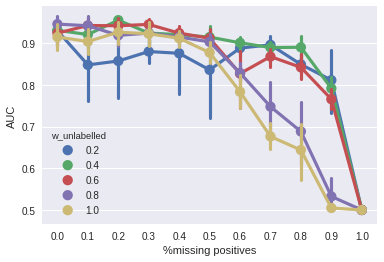

In [7]:
import seaborn as sns
%matplotlib inline
f, ax = plt.subplots(1)


sns.pointplot(x='%missing', y='AUC', hue='w_unlabelled', data=acc_grid[acc_grid['w_unlabelled'].isin([0.2, 0.4, 0.6, 0.8, 1.0])], ax=ax)
ax.set_xlabel('%missing positives')
ax.set_ylabel('AUC')